In [1]:
import pandas as pd
stock_price_data = pd.read_csv('NFLX.csv', index_col= 'Date')

In [2]:
stock_price_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7789800
2022-02-07,410.170013,412.350006,393.549988,402.100006,402.100006,8232900
2022-02-08,398.179993,406.609985,395.829987,403.529999,403.529999,6818500
2022-02-09,408.649994,412.980011,398.790009,412.890015,412.890015,7738200
2022-02-10,402.100006,408.000000,396.359985,406.269989,406.269989,8452900


In [3]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib as mpl

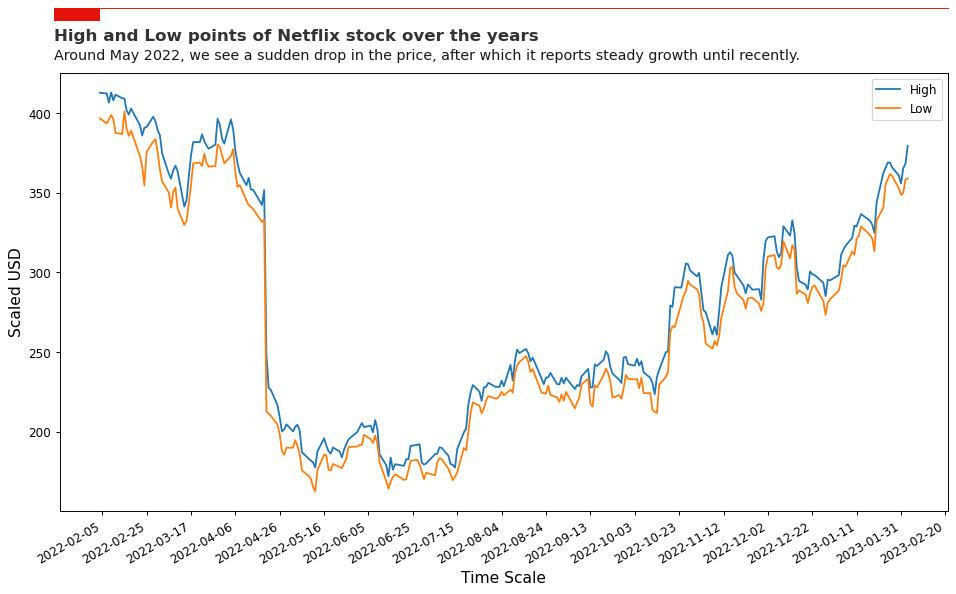

In [4]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_price_data.index.values]


plt.plot(x_dates,stock_price_data['High'],label = 'High')
plt.plot(x_dates, stock_price_data['Low'],label = 'Low')
plt.xlabel('Time Scale',fontsize = 13)
plt.ylabel('Scaled USD',fontsize = 13)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = "High and Low points of Netflix stock over the years", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = "Around May 2022, we see a sudden drop in the price, after which it reports steady growth until recently.",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)


plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

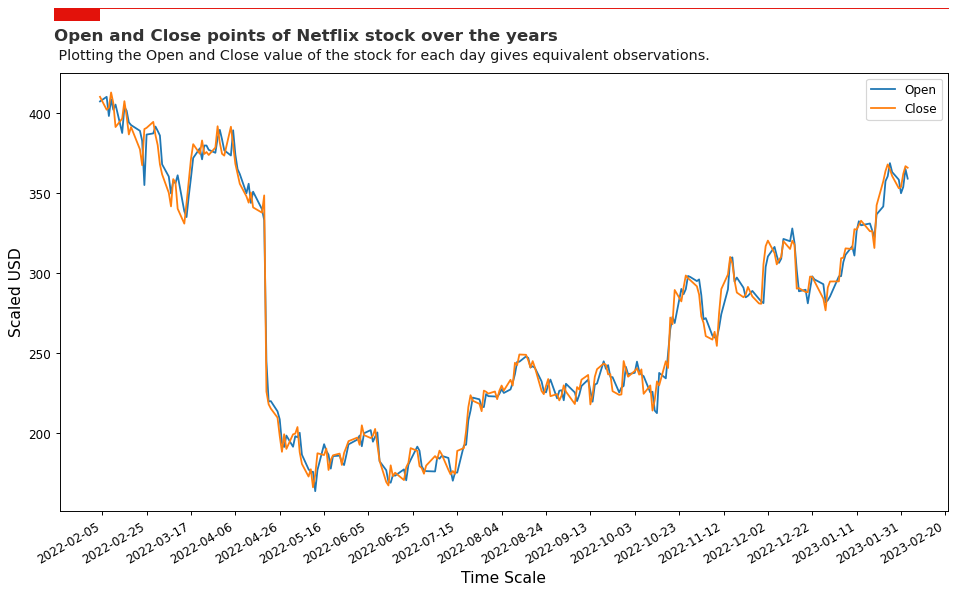

In [5]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_price_data.index.values]


plt.plot(x_dates,stock_price_data['Open'],label = 'Open')
plt.plot(x_dates, stock_price_data['Close'],label = 'Close')
plt.xlabel('Time Scale',fontsize = 13)
plt.ylabel('Scaled USD',fontsize = 13)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = "Open and Close points of Netflix stock over the years", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = " Plotting the Open and Close value of the stock for each day gives equivalent observations.",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)


plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\krishnendu\Desktop\sample_project\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split,TimeSeriesSplit

In [8]:
x = stock_price_data.drop(columns=['Close','Volume','Adj Close'], axis=1)
y = stock_price_data['Close']

In [9]:
# Feature Scalling
sc = StandardScaler()
x_fit = sc.fit_transform(x.values)
x_fit = pd.DataFrame(columns=x.columns, data = x_fit,index = x.index)

In [10]:
stock_price_data_fit = pd.concat([x_fit,y],axis = 1)

In [11]:
def lstm_split(data,n_steps):
    x,y = [],[]
    for i in range(len(data) - n_steps + 1):
        x.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1 ,-1])
        
    return np.array(x), np.array(y)

In [12]:
stock_price_data_fit


,Open,High,Low,Close
Date,,,,
2022-02-04,1.915956,1.894939,1.875436,410.170013
2022-02-07,1.956247,1.889066,1.831216,402.100006
2022-02-08,1.787336,1.808798,1.863844,403.529999
2022-02-09,1.934834,1.897876,1.906203,412.890015
2022-02-10,1.842560,1.828236,1.871428,406.269989
...,...,...,...,...
2023-01-30,1.227492,1.170295,1.248922,353.109985
2023-01-31,1.108311,1.100376,1.189534,353.859985
2023-02-01,1.162971,1.232383,1.206707,361.989990


In [13]:
x1, y1 = lstm_split(stock_price_data_fit.values, n_steps= 1)
print(x1.shape)
y1.shape


(251, 1, 3)


(251,)

In [15]:
train_Split = 0.8
split_idx = int(np.ceil(len(x1)*train_Split))  # The numpy.ceil() is a mathematical function that returns the ceil of the elements of array. The ceil of the scalar x is the smallest integer i, such that i >= x
# The ceil of each element with float data-type.
data_index = stock_price_data_fit.index

x_train,x_test = x1[:split_idx], x1[spli]


NameError: name 'spli' is not defined

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=11)

In [18]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((200, 1, 3), (51, 1, 3), (200,), (51,))

# Building the LSTM model

In [19]:
x_train.shape[2]

3

In [20]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape = (x_train.shape[1], x_train.shape[2]),
             activation = 'relu',return_sequences = True))
lstm.add(Dense(1))
lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             4608      
                                                                 
 dense (Dense)               (None, 1, 1)              33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [21]:
y_train.shape

(200,)

In [22]:
x_train.shape

(200, 1, 3)

In [25]:
history = lstm.fit(x_train, y_train,validation_data= (x_test,y_test),
                  epochs = 100, batch_size = 4,
                  verbose = 2, shuffle = False,)

Epoch 1/100
50/50 - 3s - loss: 77124.7578 - val_loss: 84857.8359 - 3s/epoch - 55ms/step
Epoch 2/100
50/50 - 0s - loss: 76921.1328 - val_loss: 84605.8438 - 159ms/epoch - 3ms/step
Epoch 3/100
50/50 - 0s - loss: 76567.1484 - val_loss: 84163.1484 - 162ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 75962.4453 - val_loss: 83445.9297 - 164ms/epoch - 3ms/step
Epoch 5/100
50/50 - 0s - loss: 75039.5078 - val_loss: 82411.0000 - 174ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 73781.2266 - val_loss: 81060.6250 - 171ms/epoch - 3ms/step
Epoch 7/100
50/50 - 0s - loss: 72213.4531 - val_loss: 79427.2422 - 179ms/epoch - 4ms/step
Epoch 8/100
50/50 - 0s - loss: 70383.2344 - val_loss: 77554.6562 - 167ms/epoch - 3ms/step
Epoch 9/100
50/50 - 0s - loss: 68341.5312 - val_loss: 75486.7969 - 173ms/epoch - 3ms/step
Epoch 10/100
50/50 - 0s - loss: 66135.2422 - val_loss: 73263.2891 - 159ms/epoch - 3ms/step
Epoch 11/100
50/50 - 0s - loss: 63805.3086 - val_loss: 70918.7266 - 165ms/epoch - 3ms/step
Epoch 12/1

Epoch 92/100
50/50 - 0s - loss: 6923.0908 - val_loss: 7624.6606 - 160ms/epoch - 3ms/step
Epoch 93/100
50/50 - 0s - loss: 6819.5767 - val_loss: 7506.8076 - 163ms/epoch - 3ms/step
Epoch 94/100
50/50 - 0s - loss: 6718.7549 - val_loss: 7392.1870 - 170ms/epoch - 3ms/step
Epoch 95/100
50/50 - 0s - loss: 6620.6455 - val_loss: 7280.6758 - 168ms/epoch - 3ms/step
Epoch 96/100
50/50 - 0s - loss: 6525.5894 - val_loss: 7172.5337 - 170ms/epoch - 3ms/step
Epoch 97/100
50/50 - 0s - loss: 6433.7925 - val_loss: 7067.8711 - 164ms/epoch - 3ms/step
Epoch 98/100
50/50 - 0s - loss: 6345.6465 - val_loss: 6966.7485 - 171ms/epoch - 3ms/step
Epoch 99/100
50/50 - 0s - loss: 6261.5889 - val_loss: 6869.7671 - 166ms/epoch - 3ms/step
Epoch 100/100
50/50 - 0s - loss: 6181.8677 - val_loss: 6776.8247 - 160ms/epoch - 3ms/step


{'verbose': 2, 'epochs': 100, 'steps': 50}

In [172]:
y_test.shape

(51,)

RSME : 62.36508588790287
MAPE : 0.20877818194132083


In [ ]:
dates = []
for i in range(len(y_test)):
    ind = where(y_test[i] == )

In [27]:
test_index = []
for i in range(len(y_test)):
    idx = stock_price_data_fit[stock_price_data['Close'] == y_test[i]].index
    test_index.append(idx)
test_index = pd.DataFrame((test_index))

In [28]:
test_index['y_test'] = y_test
test_index.sort_values(by = 0,inplace=True)

In [29]:
test_index[0]

48    2022-02-08
23    2022-02-09
31    2022-02-17
36    2022-02-22
50    2022-02-25
34    2022-03-07
10    2022-03-09
2     2022-03-15
37    2022-03-18
44    2022-03-24
18    2022-03-29
13    2022-04-01
33    2022-04-05
25    2022-04-21
28    2022-04-25
41    2022-04-26
32    2022-05-03
30    2022-05-04
40    2022-05-06
16    2022-06-06
6     2022-06-23
20    2022-06-28
0     2022-06-29
46    2022-07-22
1     2022-08-02
49    2022-08-09
5     2022-08-10
7     2022-08-18
35    2022-08-31
22    2022-09-07
29    2022-09-09
27    2022-09-22
3     2022-10-10
38    2022-10-13
12    2022-10-17
17    2022-10-19
15    2022-11-04
47    2022-11-07
4     2022-11-14
42    2022-11-18
43    2022-11-22
24    2022-11-23
9     2022-11-28
8     2022-12-07
39    2022-12-09
14    2022-12-19
19    2022-12-21
26    2022-12-22
21    2023-01-11
11    2023-01-17
45    2023-02-02
Name: 0, dtype: object

In [30]:
y_pred = lstm.predict(x_test,verbose=2)
y_pred = y_pred.reshape(51,)
rmse = mean_squared_error(y_test,y_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RSME :" ,rmse)
print("MAPE :",mape)

2/2 - 0s - 363ms/epoch - 182ms/step
RSME : 54.79685869479182
MAPE : 0.18488796837866542


In [34]:
y_pred

array([289.98468, 218.75974, 268.28143, 212.50372, 241.08086, 203.65161,
       287.99908, 203.7073 , 247.34392, 233.75417, 288.18488, 261.9359 ,
       203.48082, 316.59628, 236.99335, 220.19527, 255.71088, 221.52478,
       340.8864 , 238.76276, 276.7291 , 259.54254, 220.83643, 383.66718,
       235.59642, 225.31026, 241.16798, 204.64221, 238.08774, 207.87999,
       259.96698, 353.81116, 258.3548 , 337.64426, 288.36462, 212.18608,
       335.99692, 314.06393, 225.37932, 257.97437, 282.44336, 247.91486,
       239.97188, 232.64035, 318.08078, 297.1757 , 219.59433, 212.5091 ,
       369.36685, 210.18741, 335.3479 ], dtype=float32)

In [39]:
from sklearn.metrics import r2_score,accuracy_score
print(r2_score(y_test,y_pred))


0.3873200979530591


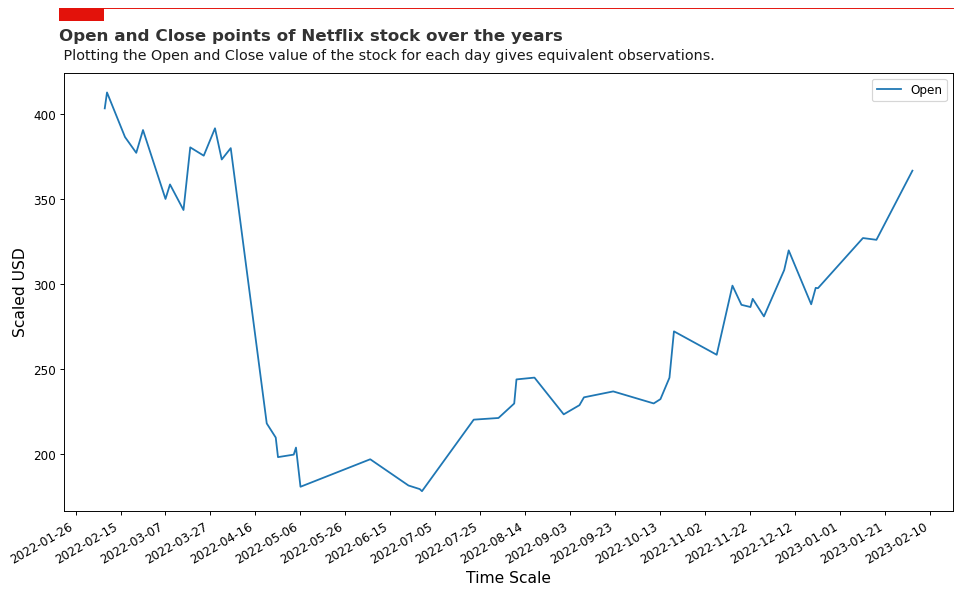

In [243]:
fig, ax = plt.subplots(figsize = (13.33,7.5),dpi = 86)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in test_index[0]]


plt.plot(x_dates,test_index['y_test'],label = 'Open')
#plt.plot(x_dates, y_pred,label = 'Close')
plt.xlabel('Time Scale',fontsize = 13)
plt.ylabel('Scaled USD',fontsize = 13)

# Add redline and rectangle on top of the figure
ax.plot([0.12,0.9],[0.98,0.98],transform = fig.transFigure, clip_on = False, color = '#E3120B',linewidth = 0.8)
ax.add_patch(plt.Rectangle((0.12,0.98),0.04,-0.02, facecolor = '#E3120B',transform = fig.transFigure,
                           clip_on = False, linewidth = 0))

# Add in title and sub title
ax.text(x = 0.12, y = 0.93, s = "Open and Close points of Netflix stock over the years", transform = fig.transFigure,
        ha = 'left', fontsize = 14, weight = 'bold', alpha = 0.8)
ax.text(x = 0.12, y = 0.90, s = " Plotting the Open and Close value of the stock for each day gives equivalent observations.",
        transform = fig.transFigure,ha = 'left', fontsize = 12, alpha = 0.9)


plt.legend()
plt.gcf().autofmt_xdate()
plt.show()